### Références : 

1. Options, futures and other derivatives, John HULL, 10th
2. Mastering-Python-for-Finance-source-codes Book material code

31 : Equilibrium Models of the Short Rate (p. 702)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Vasicek Model

In Vasicek’s model, the risk-neutral process for $r$ is

$$ dr = a(b-r)dt + \sigma dz $$

where $a, b,$ and $\sigma$ are nonnegative constants.2 This model incorporates mean reversion. The short rate is pulled to a  "reversion level" $ b $ at "reversion rate" $a$. Superimposed upon this pull is a normally distributed stochastic term $ \sigma dz $.

Zero-coupon bond prices in Vasicek’s model are given by $ P(t,T) = A(t,T) \times e^{-B(t,T) \times r(t)}$ .


###  Cox Ingersoll Ross ( CIR) Model

Cox, Ingersoll, and Ross (CIR) have proposed the following alternative model in risk neutral world :

$$ dr = a(b-r)dt + \sigma \sqrt{r} dz $$

where $a, b,$ and $\sigma$ are nonnegative constants. This has the same mean-reverting drift as Vasicek, but the standard deviation of the change in the short rate in a short period of time is proportional to $ \sqrt{x} $ This means that, as the short-term interest rate increases, the standard deviation increases. Bond prices in the CIR model have the same general form as those in Vasicek’s model $ P(t,T) = A(t,T) \times e^{-B(t,T) \times r(t)}$ but the functions $ A(t,T) $ and $ B(t,T) $ are different

Params : 

- r(0) = 0,04
- a = 0,2
- b = 0,041
- sigma(cir) = 0,05


In [3]:
""" Simulate interest rate path by the CIR model risque neutre """

# dt dépend du pas de simulation de taux, mais doit être un pas pour taux court donc un pas court, 1 mois pour paul willmot ou 3 mois
# comme dans l'exmple du option futures and others derivative.
# Ce pas dépendra donc te la fréquence du taux utilisé pour la calibration, si le modèle est calibré sur les des taux un mois
# on prend un pas un mois, si ce sont des taux trois mois on prend un pas de trois mois

def cir(r0, a, b, sigma, T=1., N=10):
    #np.random.seed(seed)
    dt = T/float(N)    
    rates = [r0]
    for i in range(N):
        dr = a*(b-rates[-1])*dt + \
            sigma*math.sqrt(rates[-1])*np.random.normal()
        rates.append(rates[-1] + dr)
    return np.arange(0,T+dt,dt), rates

#### Properties of Vasicek and CIR models :

The $A(t,T)$ and $B(t,T)$ functions are different for Vasicek and CIR, but for both models : 

$$ P(t,T) = A(t,T) \times e^{-B(t,T) \times r(t)}$$

so that

$$ \frac{\sigma P(t,T)}{ \sigma r(t)} = -B(t,T) \times P(t,T) $$

From $ R(t,T) = - \frac{1}{T-t} ln (P(t,T)) $, the zero rate at time $t$ for a period of $T-t$ is : 

$$ R(t,T) = - \frac{1}{T-t}ln (A(t,T)) + \frac{1}{T-t} B(t,T)r(t) $$

One difference between Vasicek and CIR is that in Vasicek the short rate, $ r(t) $, can  become negative whereas in CIR this is not possible. If $ 2ab >= \sigma^{2} $ in CIR, $r(t)$ is never zero; otherwise it occasionally touches zero.

In [4]:
### For CIR Model : a(b-r)dt + sigma * sqrt(r)* dz
### Paramètres des propriétés : 

def lamda(a, sigma):
    return math.sqrt(a*a + 2*sigma*sigma)

def B(t,T,a,sigma):
    return 2*(math.exp(lamda(a,sigma)*(T-t))-1) / \
            ((lamda(a,sigma)+a)*(math.exp(lamda(a,sigma)*(T-t))-1) + (2*lamda(a,sigma)))

def A(t,T,a,b,sigma):
    return ( 2 * lamda(a,sigma)*math.exp( (a + lamda(a,sigma))*(T-t)/2 ) / \
            ((lamda(a,sigma)+a)*(math.exp(lamda(a,sigma)*(T-t))-1) + (2*lamda(a,sigma))) )**(2*a*b/(sigma**2))

# FONCTION QUI CALCUL LE TAUX LONG TERME A PARTIR DE LA DYNAMIQUE DU TAUX SPOT
def R(t,T,a,b,sigma,r,i=-1) :
    return (-1 / (T-t)) * math.log(A(t,T,a,b,sigma)) + \
     (1 / (T-t)) * (B(t,T,a,sigma) * r[i])

In [5]:
# Test de la fonction de diffusion : Courbe de taux courts modélisée avec CIR
# Veiller à bien calibrer les paramètres de la diffusion sinon on se retrouve avec des taux négatifs.

for i in range(100):
    t, rt = cir(0.01875, 0.20, 0.01, 0.012, 2.5, 10)
    pd.DataFrame([t,rt])
    
# Test de calcul du taux longterme à partir de la diffusion de taux de CIR.

R_cir = R(10, 20, 0.20, 0.041, 0.05, rt)

In [6]:
# On suppose que le dernier taux est un taux dix ans
R_cir

0.029833929879972503

In [7]:
# Maturités de la courbe de taux, (structure par terme de la courbe de taux).

df = pd.DataFrame()

mat = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 15, 20, 25, 30]

# Multi-simulation :  multidiffusion de taux longs à partir du taux court

for i in range(1000):
    tt, rtt = cir(0.01875, 0.20, 0.01, 0.012, 2.5, 10)
    df[i,] = [R(tt[-1], mat[j-1]+tt[-1], 0.20, 0.041, 0.05, rtt) for j in np.arange(1,15,1)]

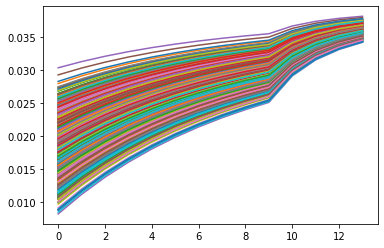

In [8]:
plt.plot(df)
plt.show()